In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [8]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [9]:
scaler = MinMaxScaler()

norm = df.copy()

normed = norm.drop(columns=['date', 'lights'])

normalised_df = pd.DataFrame(scaler.fit_transform(normed), columns=normed.columns)

features_df = normalised_df.drop(columns=['Appliances'])

heating_target = normalised_df['Appliances']

In [10]:
Y = heating_target
X = features_df

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

* fit scaler on training data fit_transform for train, transform for test
scaler = MinMaxScaler()
scaler.fit(X_train)

* transform training data
X_train_norm = scaler.transform(X_train)

* transform testing dataabs
X_test_norm = scaler.transform(X_test)

In [12]:
# with sklearn
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [13]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.15290295882253008
Coefficients: 
 [-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


Intercept: 
 172.99278787832736
Coefficients: 
 [  -3.51072478  495.52601962 -252.710373   -469.52136238  310.97103712
  102.77165244   31.00966845   27.31182902  -16.75282177   17.03563561
  252.71692835   40.7120577    11.00293428  -47.56355153  109.13469841
 -168.62716102 -203.23662712  -42.58633878 -344.3898449     7.31524276
  -83.1075989    31.22594824   13.16807161  125.43063708    0.82386956
    0.82386956]

In [14]:
y_pred = regr.predict(X_test)

In [15]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))
#8768.535925051976

Mean Squared Error 0.00765877886719537


# Answers to the Questions

1. L2 regularization is equivalent to imposing a 
* Gaussian prior

2. Cross validation: 
* is guaranteed to prevent overfitting

3. Ridge regression: 
* reduces variance at the expense of higher bias

4. In the different terms of the bias-variance tradeoff, which of the following is substantially more harmful to the test error than the training error?
* Variance

5. What can you use to find the best fit line for data in Linear Regression
* Least square error

6. Which of the following sentence is true about outliers in Linear Regression:
* Linear regression is sensitive to outliers    

7. How many coefficients do you need to estimate a simple linear regression model (One independent variable)?
* 2

8. Adding more basis functions in a linear model:
* Decreases model bias

9. A best fit line relating X and Y has a R-Squared value of 0.75. How do I interpret this information?
* X and Y are 75% related

10. The Lasso can be interpreted as least-squares linear regression where:
* weights are regularized with the l1 norm

11. Which of these is not an assumption of Linear Regression?
* Heteroscedasticity

12. From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?



The rsquared value is: 0.32


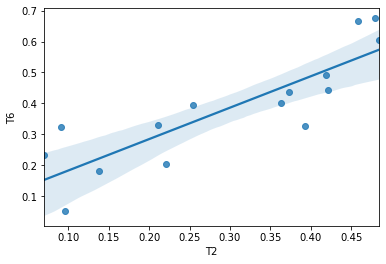

In [16]:
# Answer
simple_linear_reg_df = features_df[[ 'T2' , 'T6' ]].sample(15, random_state=2)
#regression plot
sns.regplot(x= "T2" , y= "T6" ,data=simple_linear_reg_df )

b = features_df['T2']
c = features_df['T6']
r2 = round((r2_score(c, b)), 2)
print('The rsquared value is: ' + str(r2))
#-3.72

13. What is the Mean Absolute Error (in two decimal places)?

In [17]:
#Answer
mae = round ((metrics.mean_absolute_error(y_test, y_pred)), 2)
mae
#53.64

0.05

14. What is the Residual Sum of Squares (in two decimal places)?

In [18]:
rss = np.sum(np.square(y_test - y_pred))
round(rss, 2) 
# 51918501.21

45.35

15. What is the Root Mean Squared Error (in three decimal places)?

In [19]:
#Answer
rmse = round(math.sqrt(mse), 3)
rmse
# or rmsev = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#round(rmsev, 3) 93.64

0.088

16. What is the Coefficient of Determination (in two decimal places)?
* 0.15

In [20]:
#Answer 0.14471942308518737
# wrong working r_sq = regr.score(X_train, y_train)
#print('coefficient of determination:', round(r_sq, 2))

rtwo_score = r2_score(y_test, y_pred)
round(rtwo_score, 2) 

0.15

17. Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [21]:
#Answer


18. Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [22]:
#Question 18 Answer

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.4 )
ridge_reg.fit(X_train, y_train)

def get_weights_df(model, feat, col_name) :
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = [ 'Features' , col_name]
    weights_df[col_name].round( 3 )
    return weights_df


ridge_weights_df = get_weights_df(ridge_reg, X_train , 'Ridge_Weight' )
rmser = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmser

0.08751444947661711

19. Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?
* None

In [23]:
# Question 19 Answer

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001 )
lasso_reg.fit(X_train, y_train)

def get_weights_df(model, feat, col_name) :
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = [ 'Features' , col_name]
    weights_df[col_name].round( 3 )
    return weights_df

lasso_weights_df = get_weights_df(lasso_reg, X_train , 'Lasso_weight' )

In [24]:
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


20. What is the new RMSE with the Lasso Regression (in 3 decimal places)?

In [25]:
#Answer
rmsel = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
round(rmsel, 3) 

0.088